In [1]:
import torchvision
import torch
import matplotlib.pyplot as plt
import numpy as np
import torch.nn as nn
import torch.utils.data as Data
from torchvision import transforms
from torchvision.datasets import ImageFolder

In [2]:
def fisherscore(data, labels, num):

    high = len(data)  # 向量个数
    weight = len(data[0])  # 向量长度
    P_num = np.sum(labels == 0)  # 正样本
    N_num = np.sum(labels == 1)  # 负样本

    # 计算Fisher score

    fisherscore = []
    for i in range(weight):
        p = []
        n = []
        p_var = []
        n_var = []
        for j in range(high):
            if labels[j] == 0:
                p.append(data[j, i])
            if labels[j] == 1:
                n.append(data[j, i])

        p_average = np.sum(p) / len(p)
        n_average = np.sum(n) / len(n)
        average = (np.sum(p) + np.sum(n)) / (len(p) + len(n))

        for j in range(high):
            if labels[j] == 0:
                p_var.append((data[j, i] - p_average) ** 2)
            if labels[j] == 1:
                n_var.append((data[j, i] - n_average) ** 2)

        score = ((p_average - average) ** 2 + (n_average - average) ** 2) / (
                    np.sum(p_var) / len(p) + np.sum(n_var) / len(n))

        fisherscore.append(score)

    index = np.argsort(-np.array(fisherscore))  # 返回索引
    new_data = []
    for i in range(num):
        new_data.append(data[:, index[i]])

    new_data = np.array(new_data)
    new_data = new_data.transpose(1, 0)

    return new_data

In [3]:
import torchvision
import torch
import matplotlib.pyplot as plt
import numpy as np
import torch.nn as nn
import torch.utils.data as Data
from torchvision import transforms
from torchvision.datasets import ImageFolder
from nilearn.connectome import ConnectivityMeasure
from nilearn.connectome import sym_matrix_to_vec
from nilearn import plotting


'''
加载提取出来的特征数据集
'''

'''
加载caltech数据
'''
caltech_train_features = np.load('C:\\Users\\atr\\Desktop\\save\\single\\caltech\\vgg3_train_caltechfeatures.npy')
caltech_train_labels = np.load('C:\\Users\\atr\\Desktop\\save\\single\\caltech\\vgg3_train_caltechlabels.npy')
caltech_train_features = np.squeeze(caltech_train_features)
print("caltech_train_features.shape:", caltech_train_features.shape)
print("caltech_train_labels.shape", caltech_train_labels.shape)

caltech_test_features = np.load('C:\\Users\\atr\\Desktop\\save\\single\\caltech\\vgg3_test_caltechfeatures.npy')
caltech_test_labels = np.load('C:\\Users\\atr\\Desktop\\save\\single\\caltech\\vgg3_test_caltechlabels.npy')
caltech_test_features = np.squeeze(caltech_test_features)
print("caltech_test_features.shape:", caltech_test_features.shape)
print("caltech_test_labels.shape", caltech_test_labels.shape)


#caltech构建皮尔逊矩阵
caltech_addfeatures_train = []
caltech_addfeatures_test = []

for i in range(30):
    min_train = caltech_train_features[i * 146:(i + 1) * 146]
    caltech_addfeatures_train.append(min_train)

for i in range(7):
    min_test = caltech_test_features[i * 146:(i + 1) * 146]
    caltech_addfeatures_test.append(min_test)

caltech_addfeatures_train = np.squeeze(np.array(caltech_addfeatures_train))
caltech_addfeatures_train = caltech_addfeatures_train.transpose(0,2,1)
caltech_addfeatures_test = np.squeeze(np.array(caltech_addfeatures_test))
caltech_addfeatures_test = caltech_addfeatures_test.transpose(0,2,1)

caltech_addtrain_labels = np.array([0] * 15 + [1] * 15)
caltech_addtest_labels = np.array([0] * 4 + [1] * 3)


conn_est = ConnectivityMeasure(kind='partial correlation')
caltech_addfeatures_train = conn_est.fit_transform(caltech_addfeatures_train)
#display = plotting.plot_matrix(caltech_addfeatures_train[1],figure=(5,5),vmax=1, vmin=-1,  colorbar=True,)
caltech_addfeatures_train = sym_matrix_to_vec(caltech_addfeatures_train)
caltech_addfeatures_train = fisherscore(caltech_addfeatures_train, caltech_addtrain_labels, 2000)
#display = plotting.plot_matrix(caltech_addfeatures_train,figure=(5,5),vmax=1, vmin=-1,  colorbar=True,)
print('caltech:',caltech_addfeatures_train.shape)

caltech_addfeatures_test = conn_est.fit_transform(caltech_addfeatures_test)
caltech_addfeatures_test = sym_matrix_to_vec(caltech_addfeatures_test)
caltech_addfeatures_test = fisherscore(caltech_addfeatures_test, caltech_addtest_labels, 2000)
print('caltech:',caltech_addfeatures_test.shape)

'''
加载leuven数据
'''
leuven_train_features = np.load('C:\\Users\\atr\\Desktop\\save\\single\\leuven\\vgg3_train_leuvenfeatures.npy')
leuven_train_labels = np.load('C:\\Users\\atr\\Desktop\\save\\single\\leuven\\vgg3_train_leuvenlabels.npy')
leuven_train_features = np.squeeze(leuven_train_features)
print("leuven_train_features.shape:", leuven_train_features.shape)
print("leuven_train_labels.shape", leuven_train_labels.shape)

leuven_test_features = np.load('C:\\Users\\atr\\Desktop\\save\\single\\leuven\\vgg3_test_leuvenfeatures.npy')
leuven_test_labels = np.load('C:\\Users\\atr\\Desktop\\save\\single\\leuven\\vgg3_test_leuvenlabels.npy')
leuven_test_features = np.squeeze(leuven_test_features)
print("leuven_test_features.shape:", leuven_test_features.shape)
print("leuven_test_labels.shape", leuven_test_labels.shape)

#leuven构建皮尔逊矩阵
leuven_addfeatures_train = []
leuven_addfeatures_test = []

for i in range(52):
    min_train = leuven_train_features[i * 246:(i + 1) * 246]
    leuven_addfeatures_train.append(min_train)

for i in range(11):
    min_test = leuven_test_features[i * 246:(i + 1) * 246]
    leuven_addfeatures_test.append(min_test)

leuven_addfeatures_train = np.squeeze(np.array(leuven_addfeatures_train))
leuven_addfeatures_train = leuven_addfeatures_train.transpose(0,2,1)
leuven_addfeatures_test = np.squeeze(np.array(leuven_addfeatures_test))
leuven_addfeatures_test = leuven_addfeatures_test.transpose(0,2,1)
leuven_addtrain_labels = np.array([0] * 24 + [1] * 28)
leuven_addtest_labels = np.array([0] * 5 + [1] * 6)


#conn_est = ConnectivityMeasure(kind='tangent')
leuven_addfeatures_train = conn_est.fit_transform(leuven_addfeatures_train)
leuven_addfeatures_train = sym_matrix_to_vec(leuven_addfeatures_train)
leuven_addfeatures_train = fisherscore(leuven_addfeatures_train, leuven_addtrain_labels, 2000)
print('leuven:',leuven_addfeatures_train.shape)

leuven_addfeatures_test = conn_est.fit_transform(leuven_addfeatures_test)
leuven_addfeatures_test = sym_matrix_to_vec(leuven_addfeatures_test)
leuven_addfeatures_test = fisherscore(leuven_addfeatures_test, leuven_addtest_labels, 2000)
print('leuven:',leuven_addfeatures_test.shape)

'''
加载nyu数据
'''
nyu_train_features = np.load('C:\\Users\\atr\\Desktop\\save\\single\\nyu\\vgg3_train_nyufeatures.npy')
nyu_train_labels = np.load('C:\\Users\\atr\\Desktop\\save\\single\\nyu\\vgg3_train_nyulabels.npy')
nyu_train_features = np.squeeze(nyu_train_features)
print("ohsu_train_features.shape:", nyu_train_features.shape)
print("ohsu_train_labels.shape", nyu_train_labels.shape)

nyu_test_features = np.load('C:\\Users\\atr\\Desktop\\save\\single\\nyu\\vgg3_test_nyufeatures.npy')
nyu_test_labels = np.load('C:\\Users\\atr\\Desktop\\save\\single\\nyu\\vgg3_test_nyulabels.npy')
nyu_test_features = np.squeeze(nyu_test_features)
print("ohsu_test_features.shape:", nyu_test_features.shape)
print("ohsu_test_labels.shape", nyu_test_labels.shape)

#nyu构建皮尔逊矩阵
nyu_addfeatures_train = []
nyu_addfeatures_test = []

for i in range(139):
    min_train = nyu_train_features[i * 176:(i + 1) * 176]
    nyu_addfeatures_train.append(min_train)

for i in range(35):
    min_test = nyu_test_features[i * 176:(i + 1) * 176]
    nyu_addfeatures_test.append(min_test)

nyu_addfeatures_train = np.squeeze(np.array(nyu_addfeatures_train))
nyu_addfeatures_train = nyu_addfeatures_train.transpose(0,2,1)
nyu_addfeatures_test = np.squeeze(np.array(nyu_addfeatures_test))
nyu_addfeatures_test = nyu_addfeatures_test.transpose(0,2,1)
nyu_addtrain_labels = np.array([0] * 60 + [1] * 79)
nyu_addtest_labels = np.array([0] * 15 + [1] * 20)


#conn_est = ConnectivityMeasure(kind='tangent')
nyu_addfeatures_train = conn_est.fit_transform(nyu_addfeatures_train)
nyu_addfeatures_train = sym_matrix_to_vec(nyu_addfeatures_train)
nyu_addfeatures_train = fisherscore(nyu_addfeatures_train, nyu_addtrain_labels, 2000)
print('nyu:',nyu_addfeatures_train.shape)

nyu_addfeatures_test = conn_est.fit_transform(nyu_addfeatures_test)
nyu_addfeatures_test = sym_matrix_to_vec(nyu_addfeatures_test)
nyu_addfeatures_test = fisherscore(nyu_addfeatures_test, nyu_addtest_labels, 2000)
print('nyu:',nyu_addfeatures_test.shape)

'''
加载ohsu数据
'''
ohsu_train_features = np.load('C:\\Users\\atr\\Desktop\\save\\single\\ohsu\\vgg3_train_ohsufeatures.npy')
ohsu_train_labels = np.load('C:\\Users\\atr\\Desktop\\save\\single\\ohsu\\vgg3_train_ohsulabels.npy')
ohsu_train_features = np.squeeze(ohsu_train_features)
print("ohsu_train_features.shape:", ohsu_train_features.shape)
print("ohsu_train_labels.shape", ohsu_train_labels.shape)

ohsu_test_features = np.load('C:\\Users\\atr\\Desktop\\save\\single\\ohsu\\vgg3_test_ohsufeatures.npy')
ohsu_test_labels = np.load('C:\\Users\\atr\\Desktop\\save\\single\\ohsu\\vgg3_test_ohsulabels.npy')
ohsu_test_features = np.squeeze(ohsu_test_features)
print("ohsu_test_features.shape:", ohsu_test_features.shape)
print("ohsu_test_labels.shape", ohsu_test_labels.shape)

#ohsu构建皮尔逊矩阵
ohsu_addfeatures_train = []
ohsu_addfeatures_test = []

for i in range(22):
    min_train = ohsu_train_features[i * 78:(i + 1) * 78]
    ohsu_addfeatures_train.append(min_train)

for i in range(4):
    min_test = ohsu_test_features[i * 78:(i + 1) * 78]
    ohsu_addfeatures_test.append(min_test)

ohsu_addfeatures_train = np.squeeze(np.array(ohsu_addfeatures_train))
ohsu_addfeatures_train = ohsu_addfeatures_train.transpose(0,2,1)
ohsu_addfeatures_test = np.squeeze(np.array(ohsu_addfeatures_test))
ohsu_addfeatures_test = ohsu_addfeatures_test.transpose(0,2,1)
ohsu_addtrain_labels = np.array([0] * 10 + [1] * 12)
ohsu_addtest_labels = np.array([0] * 2 + [1] * 2)


#conn_est = ConnectivityMeasure(kind='tangent')
ohsu_addfeatures_train = conn_est.fit_transform(ohsu_addfeatures_train)
ohsu_addfeatures_train = sym_matrix_to_vec(ohsu_addfeatures_train)
ohsu_addfeatures_train = fisherscore(ohsu_addfeatures_train, ohsu_addtrain_labels, 2000)
print('ohsu:',ohsu_addfeatures_train.shape)

ohsu_addfeatures_test = conn_est.fit_transform(ohsu_addfeatures_test)
ohsu_addfeatures_test = sym_matrix_to_vec(ohsu_addfeatures_test)
ohsu_addfeatures_test = fisherscore(ohsu_addfeatures_test, ohsu_addtest_labels, 2000)
print('ohsu:',ohsu_addfeatures_test.shape)

'''
加载olin数据
'''
olin_train_features = np.load('C:\\Users\\atr\\Desktop\\save\\single\\olin\\vgg3_train_olinfeatures.npy')
olin_train_labels = np.load('C:\\Users\\atr\\Desktop\\save\\single\\olin\\vgg3_train_olinlabels.npy')
olin_train_features = np.squeeze(olin_train_features)
print("olin_train_features.shape:", olin_train_features.shape)
print("olin_train_labels.shape", olin_train_labels.shape)

olin_test_features = np.load('C:\\Users\\atr\\Desktop\\save\\single\\olin\\vgg3_test_olinfeatures.npy')
olin_test_labels = np.load('C:\\Users\\atr\\Desktop\\save\\single\\olin\\vgg3_test_olinlabels.npy')
olin_test_features = np.squeeze(olin_test_features)
print("olin_test_features.shape:", olin_test_features.shape)
print("olin_test_labels.shape", olin_test_labels.shape)


#olin构建皮尔逊矩阵
olin_addfeatures_train = []
olin_addfeatures_test = []

for i in range(28):
    min_train = olin_train_features[i * 206:(i + 1) * 206]
    olin_addfeatures_train.append(min_train)

for i in range(6):
    min_test = olin_test_features[i * 206:(i + 1) * 206]
    olin_addfeatures_test.append(min_test)

olin_addfeatures_train = np.squeeze(np.array(olin_addfeatures_train))
olin_addfeatures_train = olin_addfeatures_train.transpose(0,2,1)
olin_addfeatures_test = np.squeeze(np.array(olin_addfeatures_test))
olin_addfeatures_test = olin_addfeatures_test.transpose(0,2,1)
olin_addtrain_labels = np.array([0] * 16 + [1] * 12)
olin_addtest_labels = np.array([0] * 3 + [1] * 3)


#conn_est = ConnectivityMeasure(kind='tangent')
olin_addfeatures_train = conn_est.fit_transform(olin_addfeatures_train)
olin_addfeatures_train = sym_matrix_to_vec(olin_addfeatures_train)
olin_addfeatures_train = fisherscore(olin_addfeatures_train, olin_addtrain_labels, 2000)
print('olin:',olin_addfeatures_train.shape)

olin_addfeatures_test = conn_est.fit_transform(olin_addfeatures_test)
olin_addfeatures_test = sym_matrix_to_vec(olin_addfeatures_test)
olin_addfeatures_test = fisherscore(olin_addfeatures_test, olin_addtest_labels, 2000)
print('olin:',olin_addfeatures_test.shape)

'''
加载pitt数据
'''
pitt_train_features = np.load('C:\\Users\\atr\\Desktop\\save\\single\\pitt\\vgg3_train_pittfeatures.npy')
pitt_train_labels = np.load('C:\\Users\\atr\\Desktop\\save\\single\\pitt\\vgg3_train_pittlabels.npy')
pitt_train_features = np.squeeze(pitt_train_features)
print("pitt_train_features.shape:", pitt_train_features.shape)
print("pitt_train_labels.shape", pitt_train_labels.shape)

pitt_test_features = np.load('C:\\Users\\atr\\Desktop\\save\\single\\pitt\\vgg3_test_pittfeatures.npy')
pitt_test_labels = np.load('C:\\Users\\atr\\Desktop\\save\\single\\pitt\\vgg3_test_pittlabels.npy')
pitt_test_features = np.squeeze(pitt_test_features)
print("pitt_test_features.shape:", pitt_test_features.shape)
print("pitt_test_labels.shape", pitt_test_labels.shape)

#pitt构建皮尔逊矩阵
pitt_addfeatures_train = []
pitt_addfeatures_test = []

for i in range(46):
    min_train = pitt_train_features[i * 196:(i + 1) * 196]
    pitt_addfeatures_train.append(min_train)

for i in range(10):
    min_test = pitt_test_features[i * 196:(i + 1) * 196]
    pitt_addfeatures_test.append(min_test)

pitt_addfeatures_train = np.squeeze(np.array(pitt_addfeatures_train))
pitt_addfeatures_train = pitt_addfeatures_train.transpose(0,2,1)
pitt_addfeatures_test = np.squeeze(np.array(pitt_addfeatures_test))
pitt_addfeatures_test = pitt_addfeatures_test.transpose(0,2,1)
pitt_addtrain_labels = np.array([0] * 24 + [1] * 22)
pitt_addtest_labels = np.array([0] * 5 + [1] * 5)


#conn_est = ConnectivityMeasure(kind='tangent')
pitt_addfeatures_train = conn_est.fit_transform(pitt_addfeatures_train)
pitt_addfeatures_train = sym_matrix_to_vec(pitt_addfeatures_train)
pitt_addfeatures_train = fisherscore(pitt_addfeatures_train, pitt_addtrain_labels, 2000)
print('pitt:',pitt_addfeatures_train.shape)

pitt_addfeatures_test = conn_est.fit_transform(pitt_addfeatures_test)
pitt_addfeatures_test = sym_matrix_to_vec(pitt_addfeatures_test)
pitt_addfeatures_test = fisherscore(pitt_addfeatures_test, pitt_addtest_labels, 2000)
print('pitt:',pitt_addfeatures_test.shape)


'''
加载sbl数据
'''
sbl_train_features = np.load('C:\\Users\\atr\\Desktop\\save\\single\\sbl\\vgg3_train_sblfeatures.npy')
sbl_train_labels = np.load('C:\\Users\\atr\\Desktop\\save\\single\\sbl\\vgg3_train_sbllabels.npy')
sbl_train_features = np.squeeze(sbl_train_features)
print("sbl_train_features.shape:", sbl_train_features.shape)
print("sbl_train_labels.shape", sbl_train_labels.shape)

sbl_test_features = np.load('C:\\Users\\atr\\Desktop\\save\\single\\sbl\\vgg3_test_sblfeatures.npy')
sbl_test_labels = np.load('C:\\Users\\atr\\Desktop\\save\\single\\sbl\\vgg3_test_sbllabels.npy')
sbl_test_features = np.squeeze(sbl_test_features)
print("sbl_test_features.shape:", sbl_test_features.shape)
print("sbl_test_labels.shape", sbl_test_labels.shape)

#sbl构建皮尔逊矩阵
sbl_addfeatures_train = []
sbl_addfeatures_test = []

for i in range(24):
    min_train = sbl_train_features[i * 196:(i + 1) * 196]
    sbl_addfeatures_train.append(min_train)

for i in range(5):
    min_test = sbl_test_features[i * 196:(i + 1) * 196]
    sbl_addfeatures_test.append(min_test)

sbl_addfeatures_train = np.squeeze(np.array(sbl_addfeatures_train))
sbl_addfeatures_train = sbl_addfeatures_train.transpose(0,2,1)
sbl_addfeatures_test = np.squeeze(np.array(sbl_addfeatures_test))
sbl_addfeatures_test = sbl_addfeatures_test.transpose(0,2,1)
sbl_addtrain_labels = np.array([0] * 12 + [1] * 12)
sbl_addtest_labels = np.array([0] * 2 + [1] * 3)


#conn_est = ConnectivityMeasure(kind='tangent')
sbl_addfeatures_train = conn_est.fit_transform(sbl_addfeatures_train)
sbl_addfeatures_train = sym_matrix_to_vec(sbl_addfeatures_train)
sbl_addfeatures_train = fisherscore(sbl_addfeatures_train, sbl_addtrain_labels, 2000)
print('sbl:',sbl_addfeatures_train.shape)

sbl_addfeatures_test = conn_est.fit_transform(sbl_addfeatures_test)
sbl_addfeatures_test = sym_matrix_to_vec(sbl_addfeatures_test)
sbl_addfeatures_test = fisherscore(sbl_addfeatures_test, sbl_addtest_labels, 2000)
print('sbl:',sbl_addfeatures_test.shape)

'''
加载sdsu数据
'''
sdsu_train_features = np.load('C:\\Users\\atr\\Desktop\\save\\single\\sdsu\\vgg3_train_sdsufeatures.npy')
sdsu_train_labels = np.load('C:\\Users\\atr\\Desktop\\save\\single\\sdsu\\vgg3_train_sdsulabels.npy')
sdsu_train_features = np.squeeze(sdsu_train_features)
print("sdsu_train_features.shape:", sdsu_train_features.shape)
print("sdsu_train_labels.shape", sdsu_train_labels.shape)

sdsu_test_features = np.load('C:\\Users\\atr\\Desktop\\save\\single\\sdsu\\vgg3_test_sdsufeatures.npy')
sdsu_test_labels = np.load('C:\\Users\\atr\\Desktop\\save\\single\\sdsu\\vgg3_test_sdsulabels.npy')
sdsu_test_features = np.squeeze(sdsu_test_features)
print("sdsu_test_features.shape:", sdsu_test_features.shape)
print("sdsu_test_labels.shape", sdsu_test_labels.shape)

#sdsu构建皮尔逊矩阵
sdsu_addfeatures_train = []
sdsu_addfeatures_test = []

for i in range(30):
    min_train = sdsu_train_features[i * 176:(i + 1) * 176]
    sdsu_addfeatures_train.append(min_train)

for i in range(6):
    min_test = sdsu_test_features[i * 176:(i + 1) * 176]
    sdsu_addfeatures_test.append(min_test)

sdsu_addfeatures_train = np.squeeze(np.array(sdsu_addfeatures_train))
sdsu_addfeatures_train = sdsu_addfeatures_train.transpose(0,2,1)
sdsu_addfeatures_test = np.squeeze(np.array(sdsu_addfeatures_test))
sdsu_addfeatures_test = sdsu_addfeatures_test.transpose(0,2,1)
sdsu_addtrain_labels = np.array([0] * 12 + [1] * 18)
sdsu_addtest_labels = np.array([0] * 2 + [1] * 4)


#conn_est = ConnectivityMeasure(kind='tangent')
sdsu_addfeatures_train = conn_est.fit_transform(sdsu_addfeatures_train)
sdsu_addfeatures_train = sym_matrix_to_vec(sdsu_addfeatures_train)
sdsu_addfeatures_train = fisherscore(sdsu_addfeatures_train, sdsu_addtrain_labels, 2000)
print('sdsu:',sdsu_addfeatures_train.shape)

sdsu_addfeatures_test = conn_est.fit_transform(sdsu_addfeatures_test)
sdsu_addfeatures_test = sym_matrix_to_vec(sdsu_addfeatures_test)
sdsu_addfeatures_test = fisherscore(sdsu_addfeatures_test, sdsu_addtest_labels, 2000)
print('sdsu:',sdsu_addfeatures_test.shape)

'''
加载um数据
'''
um_train_features = np.load('C:\\Users\\atr\\Desktop\\save\\single\\um\\vgg3_train_umfeatures.npy')
um_train_labels = np.load('C:\\Users\\atr\\Desktop\\save\\single\\um\\vgg3_train_umlabels.npy')
um_train_features = np.squeeze(um_train_features)
print("um_train_features.shape:", um_train_features.shape)
print("um_train_labels.shape", um_train_labels.shape)

um_test_features = np.load('C:\\Users\\atr\\Desktop\\save\\single\\um\\vgg3_test_umfeatures.npy')
um_test_labels = np.load('C:\\Users\\atr\\Desktop\\save\\single\\um\\vgg3_test_umlabels.npy')
um_test_features = np.squeeze(um_test_features)
print("um_test_features.shape:", um_test_features.shape)
print("um_test_labels.shape", um_test_labels.shape)

#um构建皮尔逊矩阵
um_addfeatures_train = []
um_addfeatures_test = []

for i in range(86):
    min_train = um_train_features[i * 296:(i + 1) * 296]
    um_addfeatures_train.append(min_train)

for i in range(20):
    min_test = um_test_features[i * 296:(i + 1) * 296]
    um_addfeatures_test.append(min_test)

um_addfeatures_train = np.squeeze(np.array(um_addfeatures_train))
um_addfeatures_train = um_addfeatures_train.transpose(0,2,1)
um_addfeatures_test = np.squeeze(np.array(um_addfeatures_test))
um_addfeatures_test = um_addfeatures_test.transpose(0,2,1)
um_addtrain_labels = np.array([0] * 43 + [1] * 43)
um_addtest_labels = np.array([0] * 10 + [1] * 10)


#conn_est = ConnectivityMeasure(kind='tangent')
um_addfeatures_train = conn_est.fit_transform(um_addfeatures_train)
um_addfeatures_train = sym_matrix_to_vec(um_addfeatures_train)
um_addfeatures_train = fisherscore(um_addfeatures_train, um_addtrain_labels, 2000)
print('um:',um_addfeatures_train.shape)

um_addfeatures_test = conn_est.fit_transform(um_addfeatures_test)
um_addfeatures_test = sym_matrix_to_vec(um_addfeatures_test)
um_addfeatures_test = fisherscore(um_addfeatures_test, um_addtest_labels, 2000)
print('um:',um_addfeatures_test.shape)

'''
加载usm数据
'''
usm_train_features = np.load('C:\\Users\\atr\\Desktop\\save\\single\\usm\\vgg3_train_usmfeatures.npy')
usm_train_labels = np.load('C:\\Users\\atr\\Desktop\\save\\single\\usm\\vgg3_train_usmlabels.npy')
usm_train_features = np.squeeze(usm_train_features)
print("usm_train_features.shape:", usm_train_features.shape)
print("usm_train_labels.shape", usm_train_labels.shape)

usm_test_features = np.load('C:\\Users\\atr\\Desktop\\save\\single\\usm\\vgg3_test_usmfeatures.npy')
usm_test_labels = np.load('C:\\Users\\atr\\Desktop\\save\\single\\usm\\vgg3_test_usmlabels.npy')
usm_test_features = np.squeeze(usm_test_features)
print("usm_test_features.shape:", usm_test_features.shape)
print("usm_test_labels.shape", usm_test_labels.shape)

#usm构建皮尔逊矩阵
usm_addfeatures_train = []
usm_addfeatures_test = []

for i in range(57):
    min_train = usm_train_features[i * 236:(i + 1) * 236]
    usm_addfeatures_train.append(min_train)

for i in range(14):
    min_test = usm_test_features[i * 236:(i + 1) * 236]
    usm_addfeatures_test.append(min_test)

usm_addfeatures_train = np.squeeze(np.array(usm_addfeatures_train))
usm_addfeatures_train = usm_addfeatures_train.transpose(0,2,1)
usm_addfeatures_test = np.squeeze(np.array(usm_addfeatures_test))
usm_addfeatures_test = usm_addfeatures_test.transpose(0,2,1)
usm_addtrain_labels = np.array([0] * 37 + [1] * 20)
usm_addtest_labels = np.array([0] * 9 + [1] * 5)


#conn_est = ConnectivityMeasure(kind='tangent')
usm_addfeatures_train = conn_est.fit_transform(usm_addfeatures_train)
usm_addfeatures_train = sym_matrix_to_vec(usm_addfeatures_train)
usm_addfeatures_train = fisherscore(usm_addfeatures_train, usm_addtrain_labels, 2000)
print('usm:',usm_addfeatures_train.shape)

usm_addfeatures_test = conn_est.fit_transform(usm_addfeatures_test)
usm_addfeatures_test = sym_matrix_to_vec(usm_addfeatures_test)
usm_addfeatures_test = fisherscore(usm_addfeatures_test, usm_addtest_labels, 2000)
print('usm:',usm_addfeatures_test.shape)






'''
构建多站点数据集
'''

train_data = np.vstack((caltech_addfeatures_train,
                        leuven_addfeatures_train,
                        nyu_addfeatures_train,
                        ohsu_addfeatures_train,
                        olin_addfeatures_train,
                        pitt_addfeatures_train,
                        sbl_addfeatures_train,
                        sdsu_addfeatures_train,
                        um_addfeatures_train,
                        usm_addfeatures_train,
                        ))
train_label = np.hstack((caltech_addtrain_labels,
                         leuven_addtrain_labels,
                         nyu_addtrain_labels,
                         ohsu_addtrain_labels,
                         olin_addtrain_labels,
                         pitt_addtrain_labels,
                         sbl_addtrain_labels,
                         sdsu_addtrain_labels,
                         um_addtrain_labels,
                         usm_addtrain_labels,
                         ))

test_data = np.vstack((caltech_addfeatures_test,
                       leuven_addfeatures_test,
                       nyu_addfeatures_test,
                       ohsu_addfeatures_test,
                       olin_addfeatures_test,
                       pitt_addfeatures_test,
                       sbl_addfeatures_test,
                       sdsu_addfeatures_test,
                       um_addfeatures_test,
                       usm_addfeatures_test,
                       ))
test_label = np.hstack((caltech_addtest_labels,
                        leuven_addtest_labels,
                        nyu_addtest_labels,
                        ohsu_addtest_labels,
                        olin_addtest_labels,
                        pitt_addtest_labels,
                        sbl_addtest_labels,
                        sdsu_addtest_labels,
                        um_addtest_labels,
                        usm_addtest_labels,
                        ))





print("train_data:", train_data.shape)
print("train_label:", train_label.shape)
print("test_data:", test_data.shape)
print("test_label:", test_label.shape)



data = np.vstack((train_data, test_data))
label = np.vstack((train_label,test_label))
print('data', data.shape)
print('label', label.shape)

caltech_train_features.shape: (4380, 1000)
caltech_train_labels.shape (4380, 1)
caltech_test_features.shape: (1022, 1000)
caltech_test_labels.shape (1022, 1)
caltech: (30, 2000)


D:\anaconda\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: divide by zero encountered in double_scalars


caltech: (7, 2000)
leuven_train_features.shape: (12792, 1000)
leuven_train_labels.shape (12792, 1)
leuven_test_features.shape: (2706, 1000)
leuven_test_labels.shape (2706, 1)
leuven: (52, 2000)


D:\anaconda\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in double_scalars


leuven: (11, 2000)
ohsu_train_features.shape: (24464, 1000)
ohsu_train_labels.shape (24464, 1)
ohsu_test_features.shape: (6160, 1000)
ohsu_test_labels.shape (6160, 1)
nyu: (139, 2000)
nyu: (35, 2000)
ohsu_train_features.shape: (1716, 1000)
ohsu_train_labels.shape (1716, 1)
ohsu_test_features.shape: (312, 1000)
ohsu_test_labels.shape (312, 1)
ohsu: (22, 2000)
ohsu: (4, 2000)


D:\anaconda\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in double_scalars


olin_train_features.shape: (5768, 1000)
olin_train_labels.shape (5768, 1)
olin_test_features.shape: (1236, 1000)
olin_test_labels.shape (1236, 1)
olin: (28, 2000)


D:\anaconda\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in double_scalars


olin: (6, 2000)
pitt_train_features.shape: (9016, 1000)
pitt_train_labels.shape (9016, 1)
pitt_test_features.shape: (1960, 1000)
pitt_test_labels.shape (1960, 1)
pitt: (46, 2000)


D:\anaconda\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in double_scalars


pitt: (10, 2000)
sbl_train_features.shape: (4704, 1000)
sbl_train_labels.shape (4704, 1)
sbl_test_features.shape: (980, 1000)
sbl_test_labels.shape (980, 1)
sbl: (24, 2000)


D:\anaconda\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in double_scalars


sbl: (5, 2000)
sdsu_train_features.shape: (5280, 1000)
sdsu_train_labels.shape (5280, 1)
sdsu_test_features.shape: (1056, 1000)
sdsu_test_labels.shape (1056, 1)
sdsu: (30, 2000)


D:\anaconda\lib\site-packages\ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in double_scalars


sdsu: (6, 2000)


FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\atr\\Desktop\\save\\single\\um\\vgg3_train_umfeatures.npy'

In [ ]:
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import LSTM, Dense
import numpy as np
from keras.optimizers import SGD
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.model_selection import train_test_split
from keras.layers import Dense, Dropout, Activation, MaxPooling1D
x_train, x_test, y_train, y_test = train_test_split(data, label , test_size=0.2)
# from sklearn.neural_network import MLPClassifier
# from sklearn.model_selection import learning_curve
# from sklearn.model_selection import train_test_split

# mlps = []
# mlp = MLPClassifier(hidden_layer_sizes=(1000,200), max_iter=2000, alpha=1e-4,
#                     solver='sgd', verbose=100,
#                     learning_rate_init=0.01, n_iter_no_change=1000)

# mlp.fit(x_train, y_train)
# mlp.score(x_test, y_test)

model = Sequential()
model.add(Dense(1024, activation='relu', input_dim=2000))
model.add(Dropout(0.5))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
#model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

sgd = SGD()
model.compile(loss='binary_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])

his = model.fit(x=x_train, y=y_train, batch_size=64, epochs=1000, shuffle=True, verbose=1, 
               validation_data=(x_test, y_test))

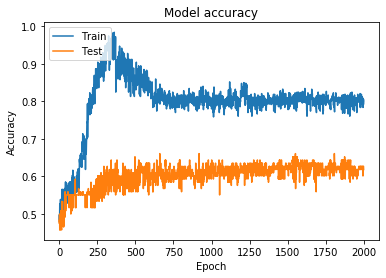

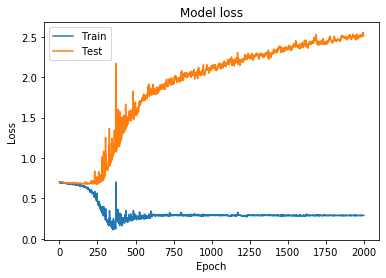

In [12]:
plt.plot(his.history['accuracy'])
plt.plot(his.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# 绘制训练 & 验证的损失值
plt.plot(his.history['loss'])
plt.plot(his.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()